      Wall time  Step       Value
0  1.717256e+09    59   80.675850
1  1.717256e+09    69   93.933243
2  1.717256e+09   109   82.953583
3  1.717256e+09   119   92.432884
4  1.717256e+09   149  108.128944


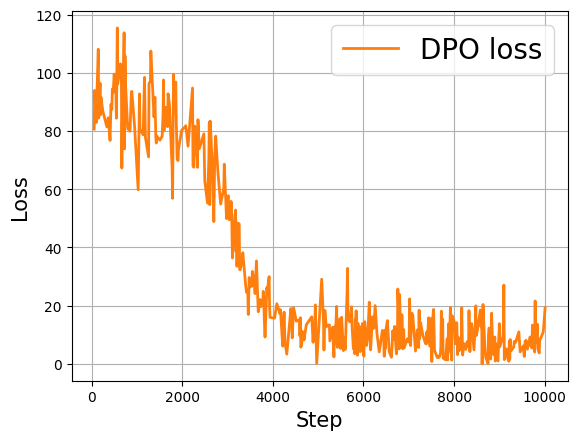

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로를 지정합니다.
file_path = '/data/jykang/NeMo/graph/preference_loss.csv'
# file_path2 = '/data/jykang/NeMo/graph/skd.csv'

# CSV 파일을 읽어옵니다.
df = pd.read_csv(file_path)
# df2 = pd.read_csv(file_path2)

# 데이터가 올바르게 로드되었는지 확인합니다.
print(df.head())
# print(df2.head())

df = df.iloc[:400]
# df2 = df2.iloc[:len(df)]

# 그래프를 그립니다.
plt.plot(df['Step'], df['Value'], linewidth=2, color='tab:orange', label='DPO loss')
# plt.plot(df2['Step'], df2['Value'], linewidth=1, color='blue', label='Dataset 2')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Step', fontsize=15)

plt.legend(loc='upper right', fontsize=20)
plt.grid()
plt.show()

(62, 2) (62, 2)


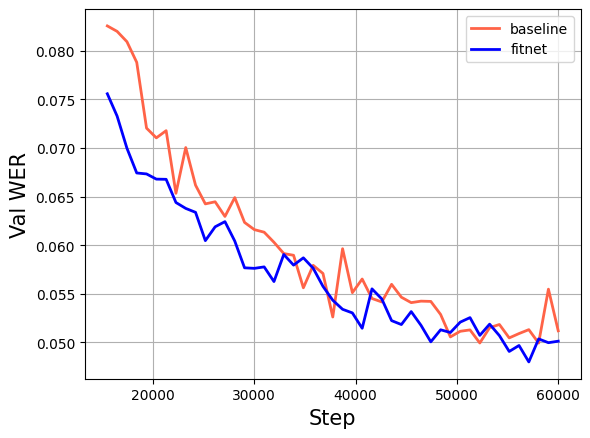

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path1 = '/data/jykang/NeMo/graph/dpo_base.csv'
file_path2 = '/data/jykang/NeMo/graph/dpo_fitnet.csv'

# CSV 파일들을 읽어옵니다.
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)


# 공통된 Step 값을 가진 데이터만 선택합니다.
common_steps = pd.merge(df1, df2, on='Step', how='inner')

# 공통된 Step 값만을 기준으로 각 데이터프레임을 다시 만듭니다.
df1_common = common_steps[['Step', 'Value_x']].rename(columns={'Value_x': 'Value'})
df2_common = common_steps[['Step', 'Value_y']].rename(columns={'Value_y': 'Value'})
print(df1_common.shape, df2_common.shape)
df1_common = df1_common.iloc[15:, :]
df2_common = df2_common.iloc[15:, :]

# 그래프를 그립니다.
plt.plot(df1_common['Step'], df1_common['Value'], linewidth=2, color='tomato', label='baseline')
plt.plot(df2_common['Step'], df2_common['Value'], linewidth=2, color='blue', label='fitnet')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Val WER', fontsize=15)
plt.xlabel('Step', fontsize=15)

plt.legend(loc='upper right', fontsize=10)
plt.grid()
plt.show()


(2871, 2) (2871, 2)


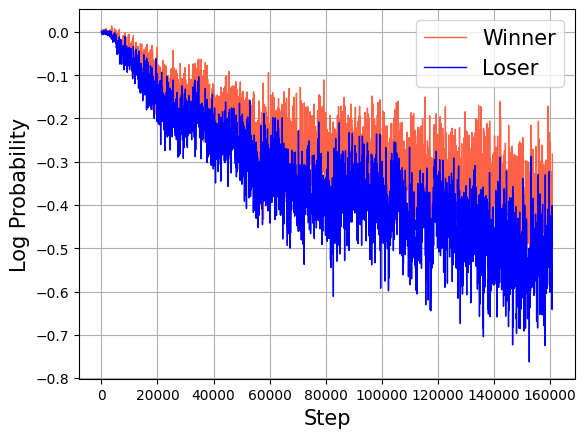

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

file_path1 = '/data/jykang/NeMo/graph/llm_chosen.csv'
file_path2 = '/data/jykang/NeMo/graph/llm_rejected.csv'

# CSV 파일들을 읽어옵니다.
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)


# 공통된 Step 값을 가진 데이터만 선택합니다.
common_steps = pd.merge(df1, df2, on='Step', how='inner')

# 공통된 Step 값만을 기준으로 각 데이터프레임을 다시 만듭니다.
df1_common = common_steps[['Step', 'anthropic_dpo_gpt2_final - rewards_train/chosen']].rename(columns={'anthropic_dpo_gpt2_final - rewards_train/chosen': 'Value'})
df2_common = common_steps[['Step', 'anthropic_dpo_gpt2_final - rewards_train/rejected']].rename(columns={'anthropic_dpo_gpt2_final - rewards_train/rejected': 'Value'})
print(df1_common.shape, df2_common.shape)
df1_common = df1_common.iloc[:, :2]
df2_common = df2_common.iloc[:, :2]

# 그래프를 그립니다.
plt.plot(df1_common['Step'], df1_common['Value'], linewidth=1, color='tomato', label='Winner')
plt.plot(df2_common['Step'], df2_common['Value'], linewidth=1, color='blue', label='Loser')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Log Probability', fontsize=15)
plt.xlabel('Step', fontsize=15)

plt.legend(loc='upper right', fontsize=15)
plt.grid()
plt.show()